In [2]:
import pandas as pd 
import numpy as np 

from sklearn import preprocessing
from sklearn import metrics

from sklearn.utils import resample

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

pd.set_option("display.max_colwidth", -1)

import matplotlib.pyplot as plt 
import seaborn as sns


In [54]:
df= pd.read_csv("Training_Dataset.csv")

In [55]:
df.head()

,cm_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,mvar49,mvar50,mvar51
0,1,Charge,0,106920,4,18,970,0.7969,0.1831,337236,...,0,0,0,0,0,0,1,0,0,0
1,2,Charge,2,0,4,19,1030,0.0678,0.0000,2918974,...,0,0,0,0,1,0,0,0,0,0
2,3,Charge,2,399168,4,35,327,0.7551,0.2986,498656,...,0,0,0,0,0,0,1,0,0,0
3,4,Charge,0,267300,4,274,1258,0.7969,0.5297,2480074,...,0,1,0,0,0,0,1,0,0,1
4,5,Charge,0,213840,6,1,0,2.3238,0.0000,2918974,...,0,0,0,0,1,0,0,1,0,0


In [56]:
df.drop(["cm_key", "mvar1"], axis=1, inplace= True)

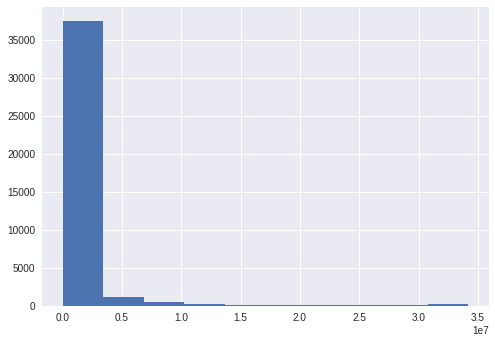

In [57]:
plt.hist(df.mvar9)
plt.show()

In [58]:
df["mvar2"][df.mvar9==0].count()

1605

In [59]:
income = df["mvar9"][df.mvar9>0]
mean_income= income.mean()
income= income.sort_values(ascending=True).reset_index()
median_income= income.median()[1]
print mean_income
median_income
df.mvar9.replace(to_replace=0, value=median_income, inplace=True)

2082066.95369


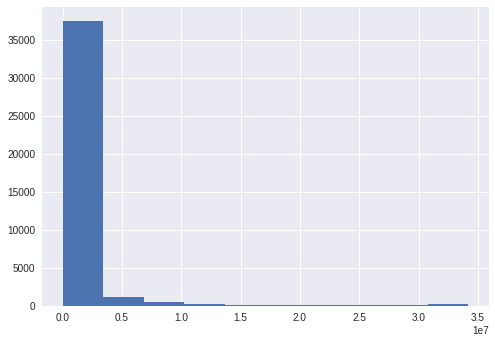

In [60]:
plt.hist(df.mvar9)
plt.show()

In [62]:
df.mvar9= np.log(df.mvar9)

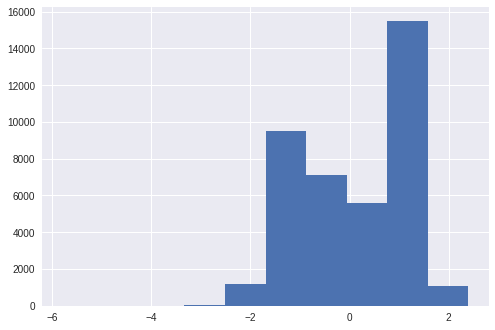

In [66]:
plt.hist((df.mvar9-df.mvar9.mean())/df.mvar9.std())
plt.show()

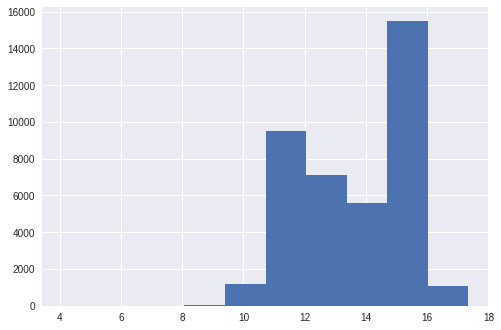

In [63]:
plt.hist(df.mvar9)
plt.show()

In [64]:
income.mvar9= np.log(income.mvar9)

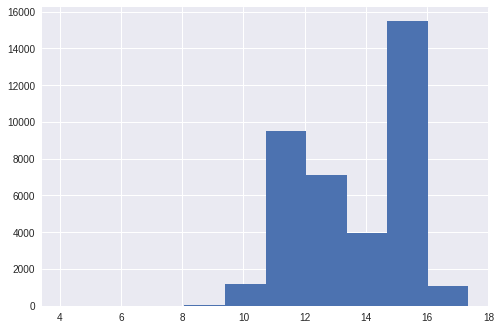

In [65]:
plt.hist(income.mvar9)
plt.show()

In [69]:
plt.matshow(df.corr())

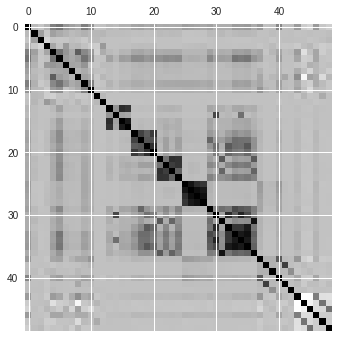

In [70]:
plt.show()

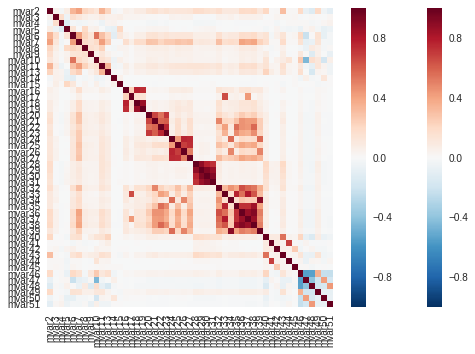

In [72]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [73]:
electronics = df.mvar16 + df.mvar17 +df.mvar18+ df.mvar19
travel = df.mvar20 + df.mvar21 +df.mvar22+ df.mvar23
household = df.mvar24 + df.mvar25 +df.mvar26+ df.mvar27
car = df.mvar28 + df.mvar29 +df.mvar30 + df.mvar31
retail= df.mvar32 + df.mvar33 +df.mvar34+ df.mvar35
spend= df.mvar36 + df.mvar37 +df.mvar38+ df.mvar39

In [79]:
df2= pd.DataFrame({
    "electronics":electronics,
    #"travel":travel,
    #"household":household,
    "car":car,
    #"retail": retail,
    "spend": spend,
})

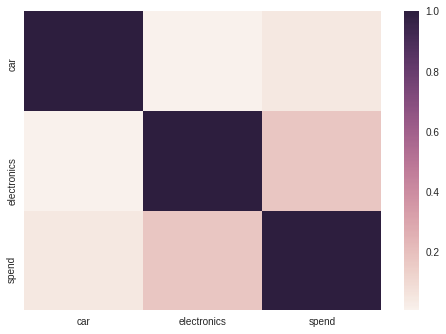

In [80]:
corr = df2.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

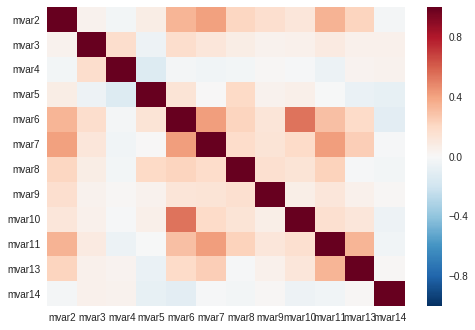

In [82]:
corr = df.iloc[:, 0:13].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

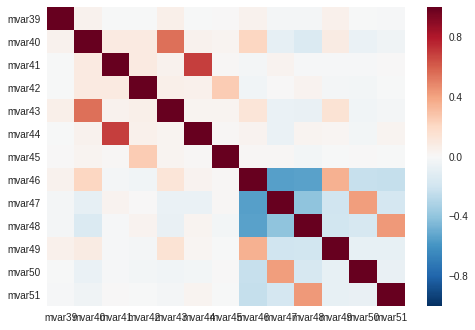

In [84]:
corr = df.iloc[:, -13:].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()